In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import ast
import sklearn
import regex as re

In [150]:
means = pd.read_csv("cofactor_expression/mean_expression.csv").set_index("tissueSiteDetailId").T
medians = pd.read_csv("cofactor_expression/median_expression.csv").set_index("tissueSiteDetailId").T
stds = pd.read_csv("cofactor_expression/std_expression.csv").set_index("tissueSiteDetailId").T
counts = pd.read_csv("cofactor_expression/counts_expression.csv").set_index("tissueSiteDetailId").T
GTEXmapper = pd.read_csv("helperfiles/mapper_GTEXcode.csv")
cofactors = pd.read_csv("helperfiles/cofactors_mapped_combined.csv")

In [151]:
cofactors_select = cofactors[["Gene Name", "Complex", "Subcomplex or Module", "UniprotID"]]
merged = cofactors_select.merge(GTEXmapper, on="UniprotID")
merged.head()

,Gene Name,Complex,Subcomplex or Module,UniprotID,Bgee,GeneID,Gene Names,GTEXGeneCode
0,BAF180,BAF,esBAF,Q86U86,ENSG00000163939,55193.0,"['PBRM1', 'BAF180', 'PB1']",ENSG00000163939.18
1,BAF180,BAF,npBAF,Q86U86,ENSG00000163939,55193.0,"['PBRM1', 'BAF180', 'PB1']",ENSG00000163939.18
2,BAF180,BAF,nBAF,Q86U86,ENSG00000163939,55193.0,"['PBRM1', 'BAF180', 'PB1']",ENSG00000163939.18
3,BCL11A,BAF,esBAF,Q9H165,ENSG00000119866,53335.0,"['BCL11A', 'CTIP1', 'EVI9', 'KIAA1809', 'ZNF856']",ENSG00000119866.20
4,BCL11A,BAF,npBAF,Q9H165,ENSG00000119866,53335.0,"['BCL11A', 'CTIP1', 'EVI9', 'KIAA1809', 'ZNF856']",ENSG00000119866.20


In [152]:
GTEXmappermain = merged[["GTEXGeneCode", "Gene Name", "Complex", "Subcomplex or Module"]]
grouped = GTEXmappermain.groupby("GTEXGeneCode").agg(list)
grouped_count = GTEXmappermain.groupby("GTEXGeneCode").agg(len)
grouped[grouped_count["Gene Name"] > 1]

,Gene Name,Complex,Subcomplex or Module
GTEXGeneCode,,,
ENSG00000028310.17,"[BRD9, BRD9, BRD9, BRD9]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000049618.22,"[BAF250B, BAF250B, ARID1B]","[BAF, BAF, Chromatin Remodelers]","[npBAF, nBAF, nan]"
ENSG00000066117.14,"[BAF60A, BAF60A, BAF60A, SMARCD1]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000073584.18,"[BAF57, BAF57, BAF57, SMARCE1]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000080503.22,"[BRM, BRM]","[BAF, BAF]","[npBAF, nBAF]"
ENSG00000082014.16,"[BAF60C, BAF60C, SMARCD3]","[BAF, BAF, Chromatin Remodelers]","[npBAF, nBAF, nan]"
ENSG00000099385.11,"[BCL7C, BCL7C, BCL7C]","[BAF, BAF, BAF]","[esBAF, npBAF, nBAF]"
ENSG00000099956.18,"[BAF47, BAF47, BAF47, SMARCB1]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000106635.7,"[BCL7B, BCL7B, BCL7B]","[BAF, BAF, BAF]","[esBAF, npBAF, nBAF]"


In [153]:
GTEXmappermain = merged[["GTEXGeneCode", "Gene Name", "Complex", "Subcomplex or Module"]]
grouped = GTEXmappermain.groupby("GTEXGeneCode").agg(lambda x: list(set(x.to_list())))
grouped["Gene Name"] = grouped["Gene Name"].apply(lambda x: x[0])

def flatten_and_clean(input_list):
    output_list = []
    
    for item in input_list:
        # If the item is a list, recursively flatten it
        if isinstance(item, list):
            output_list.extend(flatten_and_clean(item))  # Recursion to flatten sublists
        # If the item is NaN, skip it
        elif isinstance(item, float) and math.isnan(item):
            continue
        else:
            output_list.append(item.replace("[", "").replace("]", ""))
        
    return output_list

grouped["Subcomplex or Module"] = grouped["Subcomplex or Module"].apply(flatten_and_clean)

genename = grouped[["Gene Name"]]
medians_gene = np.log(medians.merge(genename, left_index=True, right_index=True).set_index("Gene Name"))
means_gene = np.log(means.merge(genename, left_index=True, right_index=True).set_index("Gene Name"))
stds_gene = stds.merge(genename, left_index=True, right_index=True).set_index("Gene Name")

In [162]:
#Sort columns adn rows highest to lowest
medians = pd.read_csv("cofactor_expression/median_expression.csv").set_index("tissueSiteDetailId")

medians_gene["Net"] = medians_gene.sum(axis=1)
medians_gene = medians_gene.sort_values("Net").drop("Net", axis = 1)
medians_gene.head()

Gene Name,MED12L,BAF53B,BAF45B,BCL11B,BCL11A,BAF45C,POLR2F,SUPT3H,INTS2,MED26,...,CDK9,TAF10,SUPT5H,SSRP1,POLR2E,KAT2A,TRIM28,SF3B5,H2AZ,ACTB
Heart_Left_Ventricle,-2.683578,-3.929356,-1.675923,-2.917501,0.261290,1.605531,-1.179213,0.125674,0.776611,0.484170,...,3.086703,3.709761,3.291346,3.211393,3.664065,3.420597,3.892731,4.364949,4.066020,6.382827
Liver,-3.537102,-3.005083,-3.883352,-1.371438,-2.765942,0.507152,-2.481975,0.012221,0.717543,0.823981,...,3.784588,4.040285,3.717231,3.402415,4.349345,4.095949,3.919481,4.700405,4.002876,6.779350
Pancreas,-2.887692,-0.717928,-2.792813,-2.225458,0.130183,-1.513758,-2.215883,0.957850,0.500552,0.787818,...,3.430806,4.046060,3.601230,3.916020,3.268220,3.919985,4.497201,4.403408,3.920480,6.166147
Whole_Blood,-1.170979,-3.302368,-3.613999,1.524378,0.189820,-1.357852,-2.202407,-0.087015,-0.150578,1.681376,...,3.578310,4.670154,3.650713,3.240513,4.091602,2.859883,4.244030,4.519806,5.198086,8.599927
Heart_Atrial_Appendage,-1.815680,-3.453862,-1.530129,-1.952894,-0.772362,1.517909,-0.330433,0.549851,1.099690,0.874079,...,3.477486,3.901220,3.617433,3.535657,3.890053,3.926640,4.109145,4.542077,4.317860,7.199892


In [163]:
medians_gene = medians_gene.T
medians_gene["Net"] = medians_gene.sum(axis=1)
medians_gene = medians_gene.sort_values("Net").drop("Net", axis = 1)
medians_gene.head()

,Heart_Left_Ventricle,Liver,Pancreas,Whole_Blood,Heart_Atrial_Appendage,Brain_Putamen_basal_ganglia,Brain_Amygdala,Brain_Substantia_nigra,Brain_Hippocampus,Brain_Caudate_basal_ganglia,...,Thyroid,Brain_Cerebellar_Hemisphere,Fallopian_Tube,Nerve_Tibial,Cervix_Ectocervix,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Ovary,Uterus,Testis
Gene Name,,,,,,,,,,,,,,,,,,,,,
MED12L,-2.683578,-3.537102,-2.887692,-1.170979,-1.815680,-0.274991,-0.057714,-0.249820,-0.282657,0.163781,...,-0.611594,0.830473,-1.025703,0.286133,0.418081,-0.872018,0.136635,-0.999966,-0.062460,1.291163
BAF53B,-3.929356,-3.005083,-0.717928,-3.302368,-3.453862,3.380787,2.973801,2.397945,3.090538,3.521083,...,-2.442370,4.826325,-2.843145,-2.839371,-3.311600,-3.248787,-3.520015,-2.231577,-3.185519,0.936985
BAF45B,-1.675923,-3.883352,-2.792813,-3.613999,-1.530129,2.424504,2.559148,1.637734,2.668494,2.527784,...,-2.309640,2.723904,-0.970424,-1.466564,-0.982315,-0.154205,-1.062618,-0.739380,-0.841544,1.590806
BCL11B,-2.917501,-1.371438,-2.225458,1.524378,-1.952894,2.336865,1.483627,-0.559906,1.674500,2.476073,...,0.655395,-1.896056,-0.192183,-1.182970,0.638650,-2.340836,-0.525094,-0.784280,-1.109120,0.273720
BCL11A,0.261290,-2.765942,0.130183,0.189820,-0.772362,1.812241,0.685463,0.384418,2.027784,1.958774,...,0.237475,-0.832854,0.108386,-2.330144,0.932661,1.871559,-0.091764,-1.244251,-0.297451,0.136160


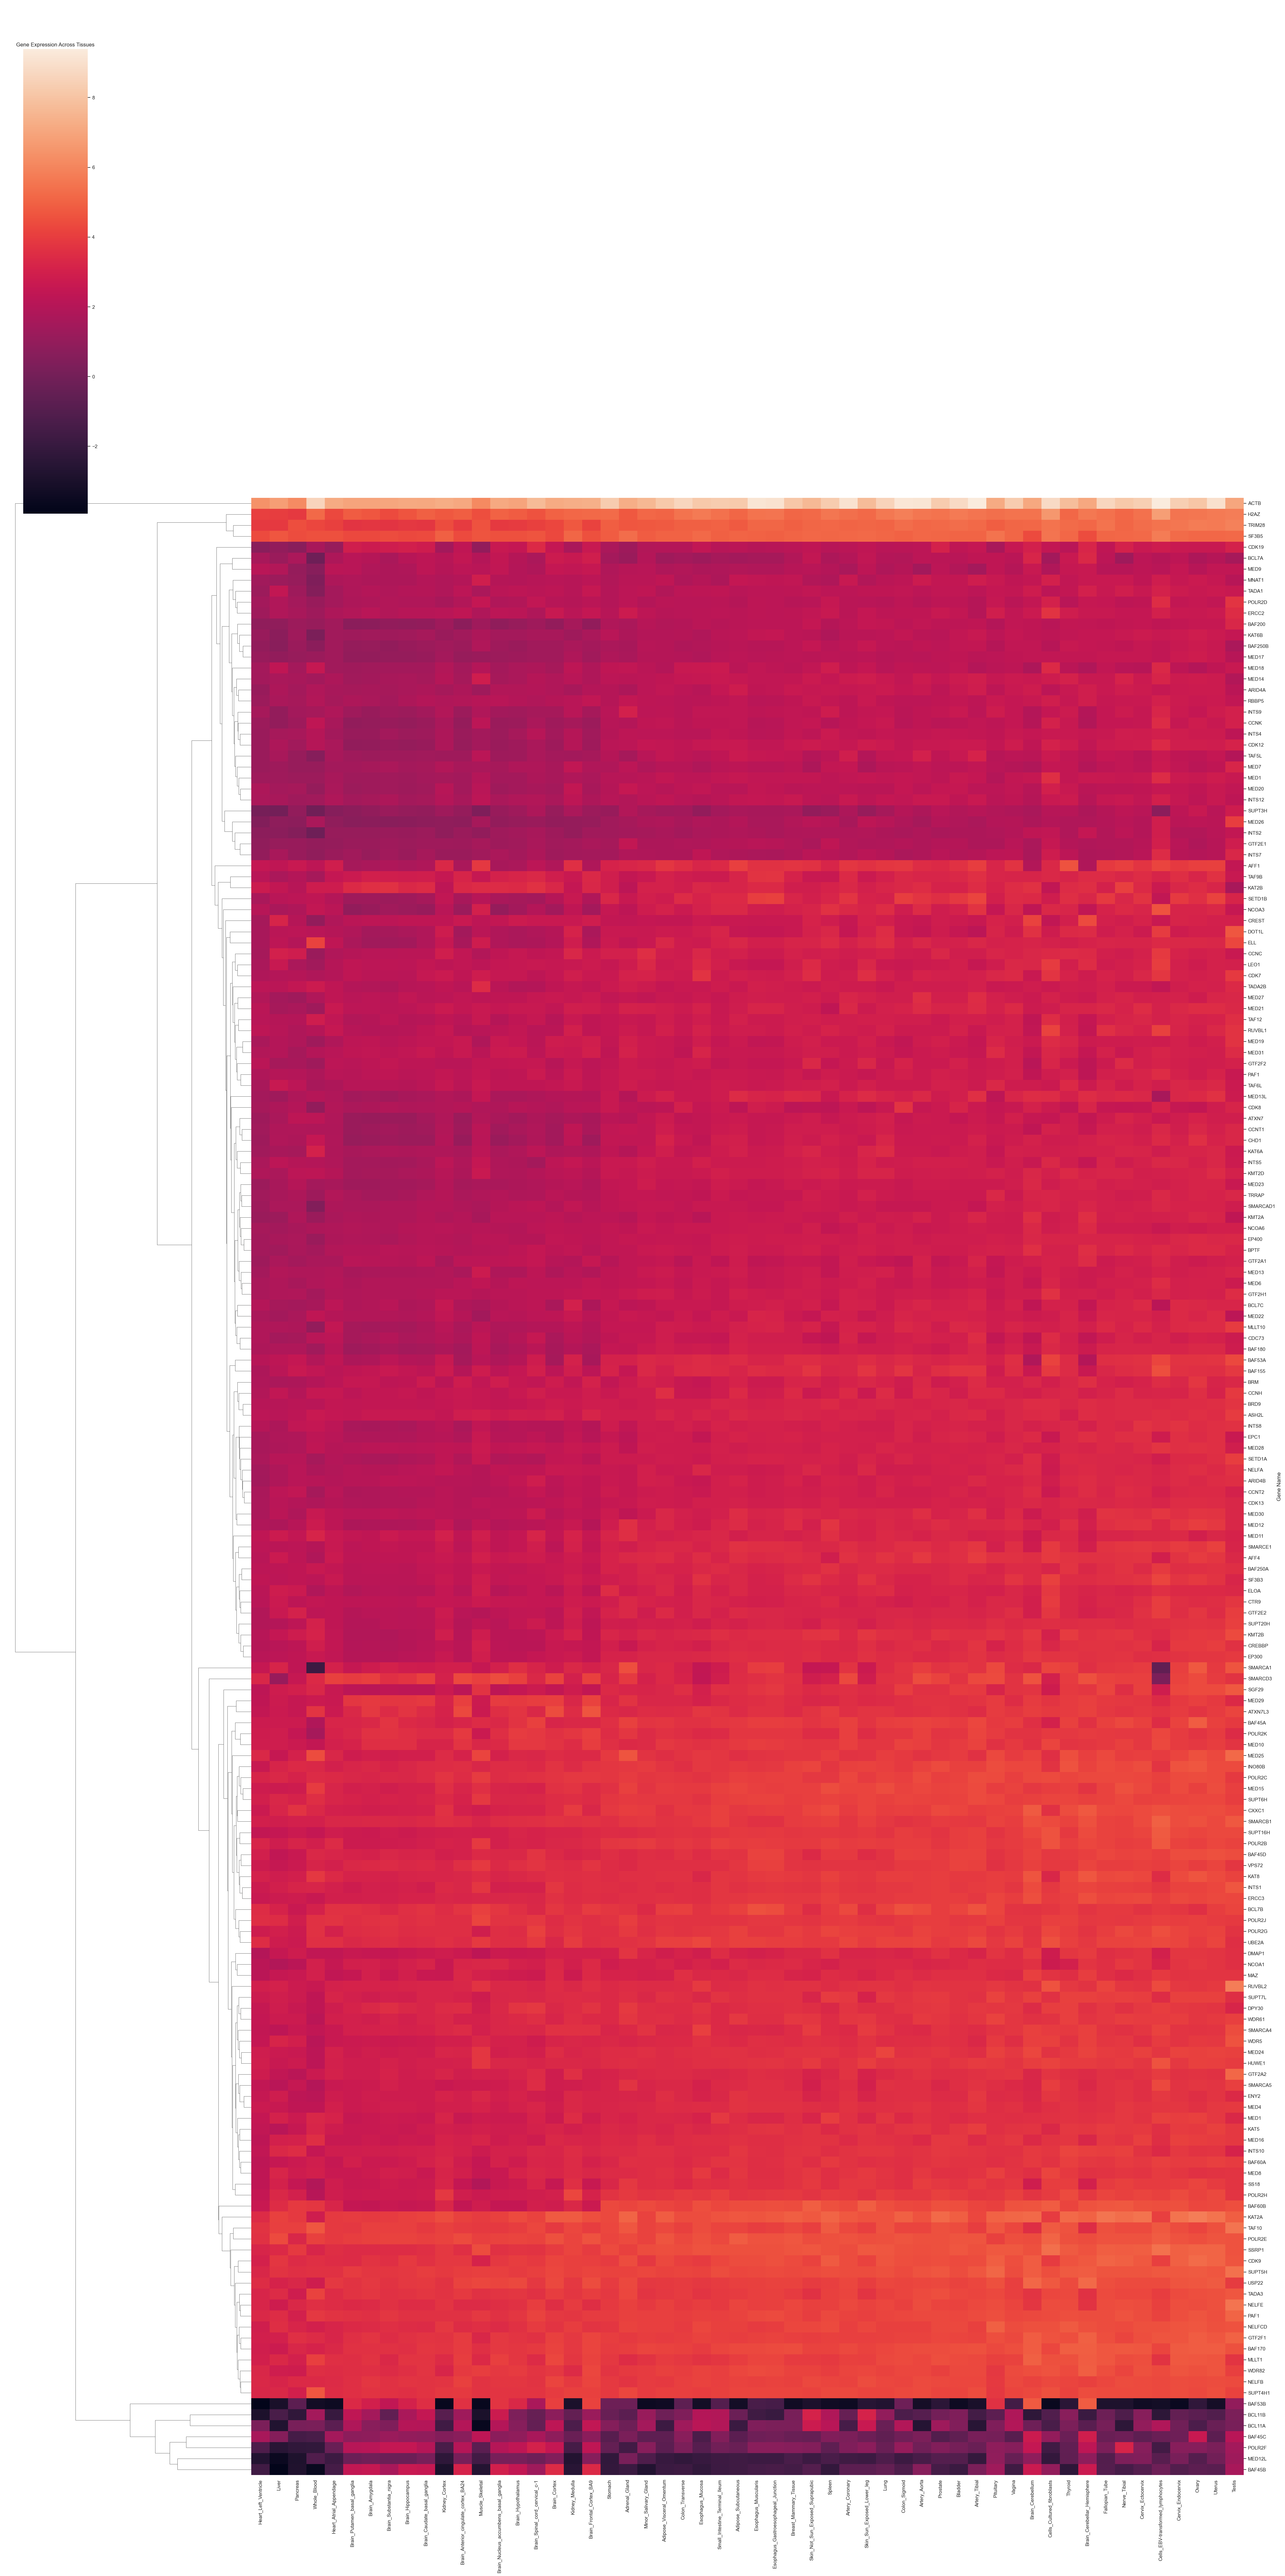

In [304]:
sns.clustermap(medians_gene, figsize=(40, 80), col_cluster=False)
plt.title("Gene Expression Across Tissues")
plt.savefig("figures/mediangeneexpression.png")

Own-complex Paralogs

In [272]:
has_paralog = cofactors[[pd.notna(x) for x in cofactors["Own-complex paralog"]]]
has_paralog_unique = has_paralog[["Gene Name", "Own-complex paralog"]].drop_duplicates()
has_paralog_unique

,Gene Name,Own-complex paralog
3,BCL11A,[BCL11B]
6,BCL11B,[BCL11A]
9,BAF60A,[BAF60B]
10,BAF60A,[BAF60C]
12,BAF60B,[BAF60A]
14,BAF250A,[BAF250B]
19,BAF45A,[BAF45D]
21,BAF45D,[BAF45A]
27,BRG1,[BRM]
41,BCL7A,"[BCL7B, BCL7C]"


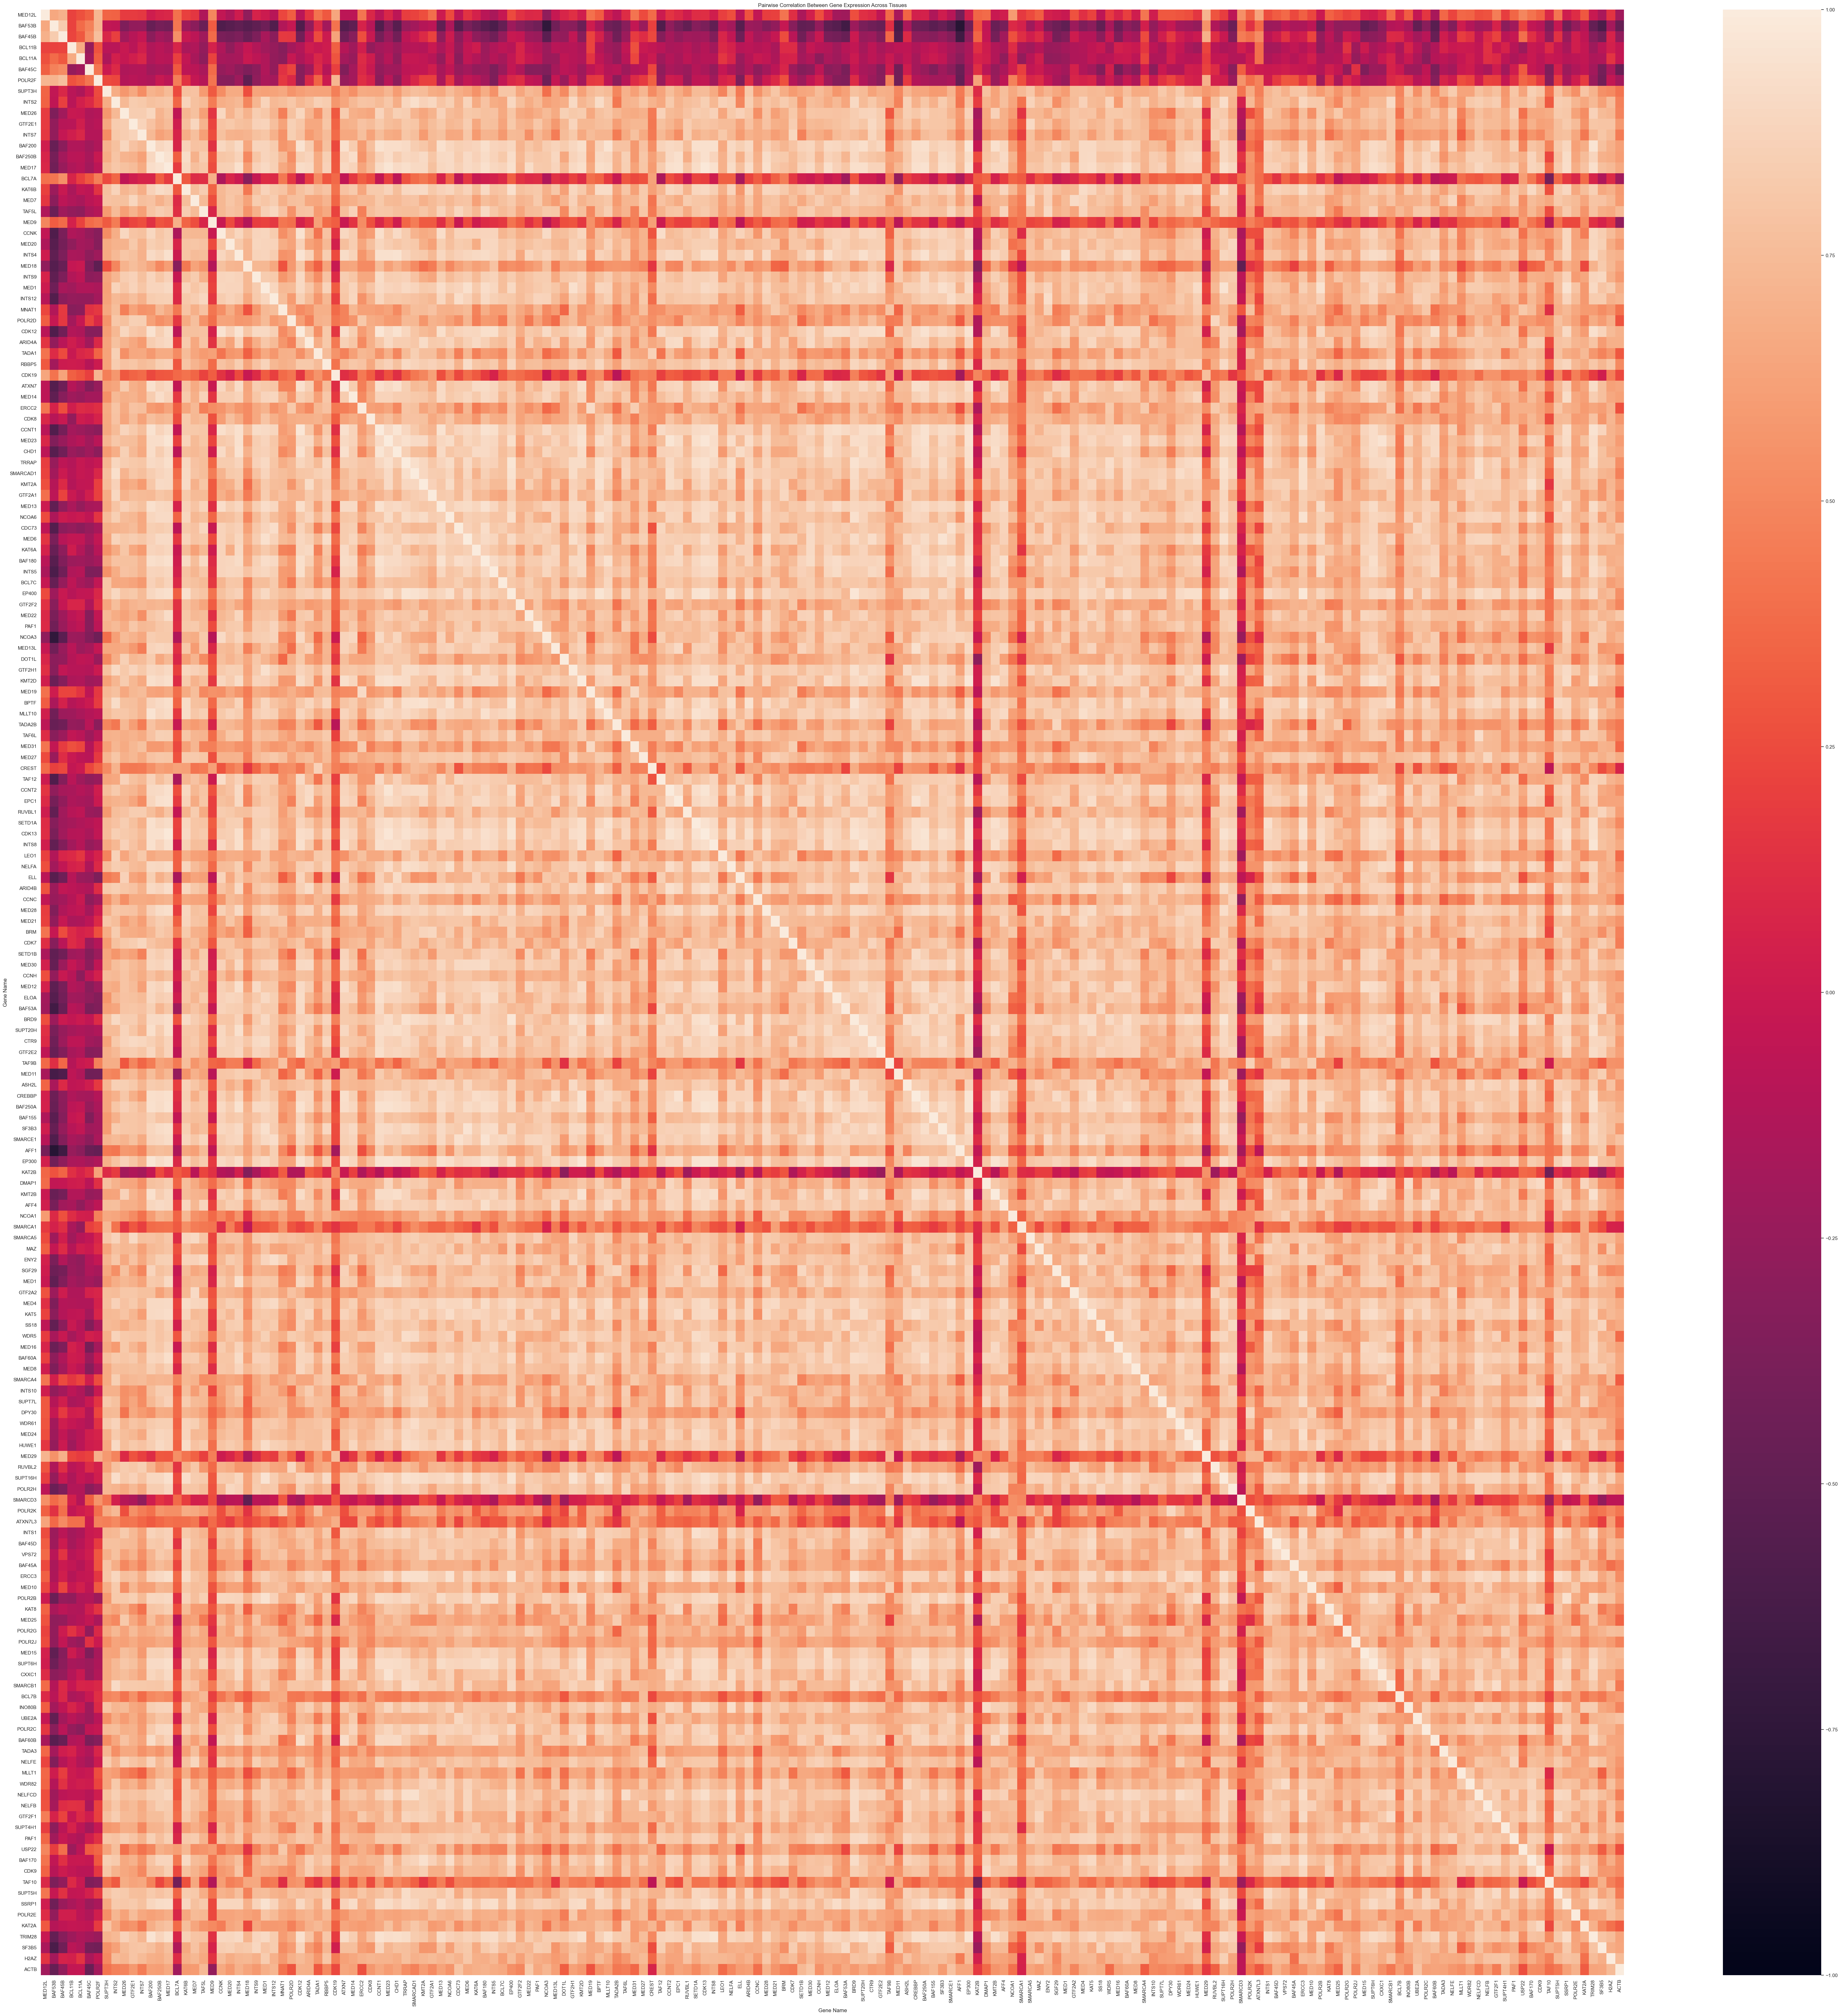

In [303]:
genecorrelation = medians_gene.T.corr()
plt.figure(figsize=(80, 80))
sns.heatmap(genecorrelation, vmin=-1, vmax=1)
plt.title("Pairwise Correlation Between Gene Expression Across Tissues")
plt.savefig("figures/mediangeneexpressioncorrelation.png")

In [310]:
#For each for in has_paralgog, look at correlation in expression data

paralog_corrs = pd.DataFrame({"GeneA": [], "GeneB": [], "Corr": []})

for i in range(len(has_paralog_unique)):
    row = has_paralog_unique.iloc[i]
    genea = row["Gene Name"]
    geneb = re.match("\[(.*)\]", row["Own-complex paralog"])[1]
    try:
        corr = np.round(genecorrelation[genea][geneb], 3)
        
    except:
        corr = np.NaN
        print(genea, geneb)
        
    paralog_corrs.loc[i] = [genea, geneb, corr]
    

paralog_corrs

BAF60A BAF60C
BRG1 BRM
BCL7A BCL7B, BCL7C
BCL7B BCL7A, BCL7C
BCL7C BCL7A, BCL7B
BAF60C BAF60A
BRM BRG1
MED12 MED12K


,GeneA,GeneB,Corr
0,BCL11A,BCL11B,0.665
1,BCL11B,BCL11A,0.665
2,BAF60A,BAF60B,0.820
3,BAF60A,BAF60C,NaN
4,BAF60B,BAF60A,0.820
5,BAF250A,BAF250B,0.918
6,BAF45A,BAF45D,0.740
7,BAF45D,BAF45A,0.740
8,BRG1,BRM,NaN
9,BCL7A,"BCL7B, BCL7C",NaN


In [ ]:
hasparalog = 

In [200]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

def aggcluster(data, numcclust):
    aggclust = AgglomerativeClustering(n_clusters=numcclust).fit(data)
    clusteringresults = pd.DataFrame({"Gene Name": medians_gene.index, "clusterID": aggclust.labels_})
    clusteringresults = clusteringresults.merge(grouped, on="Gene Name")
    return clusteringresults

def kmeans(data, numclust):
    kmeans = KMeans(n_clusters=numclust, random_state=0, n_init="auto").fit(data)
    clusteringresults = pd.DataFrame({"Gene Name": medians_gene.index, "clusterID": kmeans.labels_})
    clusteringresults = clusteringresults.merge(grouped, on="Gene Name")
    return clusteringresults

aggclustresults = aggcluster(medians_gene, 15)
kmeansclustresults = kmeans(medians_gene, 15)

In [234]:
medians_complex = medians_gene.merge(grouped, right_on="Gene Name", left_index=True).set_index("Gene Name")
medians_complex.head()

,Heart_Left_Ventricle,Liver,Pancreas,Whole_Blood,Heart_Atrial_Appendage,Brain_Putamen_basal_ganglia,Brain_Amygdala,Brain_Substantia_nigra,Brain_Hippocampus,Brain_Caudate_basal_ganglia,...,Fallopian_Tube,Nerve_Tibial,Cervix_Ectocervix,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Ovary,Uterus,Testis,Complex,Subcomplex or Module
Gene Name,,,,,,,,,,,,,,,,,,,,,
MED12L,-2.683578,-3.537102,-2.887692,-1.170979,-1.815680,-0.274991,-0.057714,-0.249820,-0.282657,0.163781,...,-1.025703,0.286133,0.418081,-0.872018,0.136635,-0.999966,-0.062460,1.291163,[Mediator],[Kinase]
BAF53B,-3.929356,-3.005083,-0.717928,-3.302368,-3.453862,3.380787,2.973801,2.397945,3.090538,3.521083,...,-2.843145,-2.839371,-3.311600,-3.248787,-3.520015,-2.231577,-3.185519,0.936985,[BAF],[nBAF]
BAF45B,-1.675923,-3.883352,-2.792813,-3.613999,-1.530129,2.424504,2.559148,1.637734,2.668494,2.527784,...,-0.970424,-1.466564,-0.982315,-0.154205,-1.062618,-0.739380,-0.841544,1.590806,[BAF],[nBAF]
BCL11B,-2.917501,-1.371438,-2.225458,1.524378,-1.952894,2.336865,1.483627,-0.559906,1.674500,2.476073,...,-0.192183,-1.182970,0.638650,-2.340836,-0.525094,-0.784280,-1.109120,0.273720,[BAF],"[esBAF, nBAF, npBAF]"
BCL11A,0.261290,-2.765942,0.130183,0.189820,-0.772362,1.812241,0.685463,0.384418,2.027784,1.958774,...,0.108386,-2.330144,0.932661,1.871559,-0.091764,-1.244251,-0.297451,0.136160,[BAF],"[esBAF, nBAF, npBAF]"


BAF Complex Proteins in Brain

In [236]:
brainlabels = [x for x in medians_gene.columns.to_list() if "Brain" in x]
BAF_only = medians_complex[["BAF" in x for x in medians_complex["Complex"]]]
BAF_brain = BAF_only[brainlabels]
BAF_brain.head()

,Brain_Putamen_basal_ganglia,Brain_Amygdala,Brain_Substantia_nigra,Brain_Hippocampus,Brain_Caudate_basal_ganglia,Brain_Anterior_cingulate_cortex_BA24,Brain_Nucleus_accumbens_basal_ganglia,Brain_Hypothalamus,Brain_Spinal_cord_cervical_c-1,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Cerebellum,Brain_Cerebellar_Hemisphere
Gene Name,,,,,,,,,,,,,
BAF53B,3.380787,2.973801,2.397945,3.090538,3.521083,3.626611,3.758403,3.323904,1.674341,4.065548,4.136678,4.767309,4.826325
BAF45B,2.424504,2.559148,1.637734,2.668494,2.527784,3.141177,2.963357,2.432490,1.281229,3.407770,3.395952,2.709516,2.723904
BCL11B,2.336865,1.483627,-0.559906,1.674500,2.476073,1.352000,2.782053,0.333128,-0.421272,0.785520,1.218815,-2.264940,-1.896056
BCL11A,1.812241,0.685463,0.384418,2.027784,1.958774,1.997323,1.953564,0.582754,-0.466979,2.268166,2.387512,-0.179442,-0.832854
BAF45C,0.795554,0.839311,1.215192,0.972922,0.891386,0.661366,0.723349,0.868560,1.610708,0.827164,0.708168,2.772761,2.889190


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
brain_PCA = pd.DataFrame(pca.fit_transform(BAF_brain)).rename({0: "PCA1-B", 1:"PCA2-B"}, axis=1)
brain_PCA["Gene Name"] = BAF_brain.index
brain_PCA = brain_PCA.set_index("Gene Name")

brain_PCA.head()

,PCA1-B,PCA2-B
Gene Name,,
BAF53B,-3.383028,0.646937
BAF45B,0.102750,1.342823
BCL11B,7.866250,4.459823
BCL11A,5.946421,3.007570
BAF45C,4.486562,-2.882410


In [252]:
BAF_only = medians_complex[["BAF" in x for x in medians_complex["Complex"]]]
nobrainlabels = [x for x in medians_gene.columns.to_list() if "Brain" not in x]
BAF_nobrain = BAF_only[nobrainlabels]

pca = PCA(n_components=2)
nobrain_PCA = pd.DataFrame(pca.fit_transform(BAF_nobrain)).rename({0: "PCA1-NB", 1:"PCA2-NB"}, axis=1)
nobrain_PCA["Gene Name"] = BAF_nobrain.index
nobrain_PCA = nobrain_PCA.set_index("Gene Name")

nobrain_PCA.head()

,PCA1-NB,PCA2-NB
Gene Name,,
BAF53B,31.755906,-2.563415
BAF45B,24.740497,-3.799754
BCL11B,17.581811,6.859557
BCL11A,16.438035,7.292608
BAF45C,15.649187,-4.542367


<Axes: ylabel='Gene Name'>

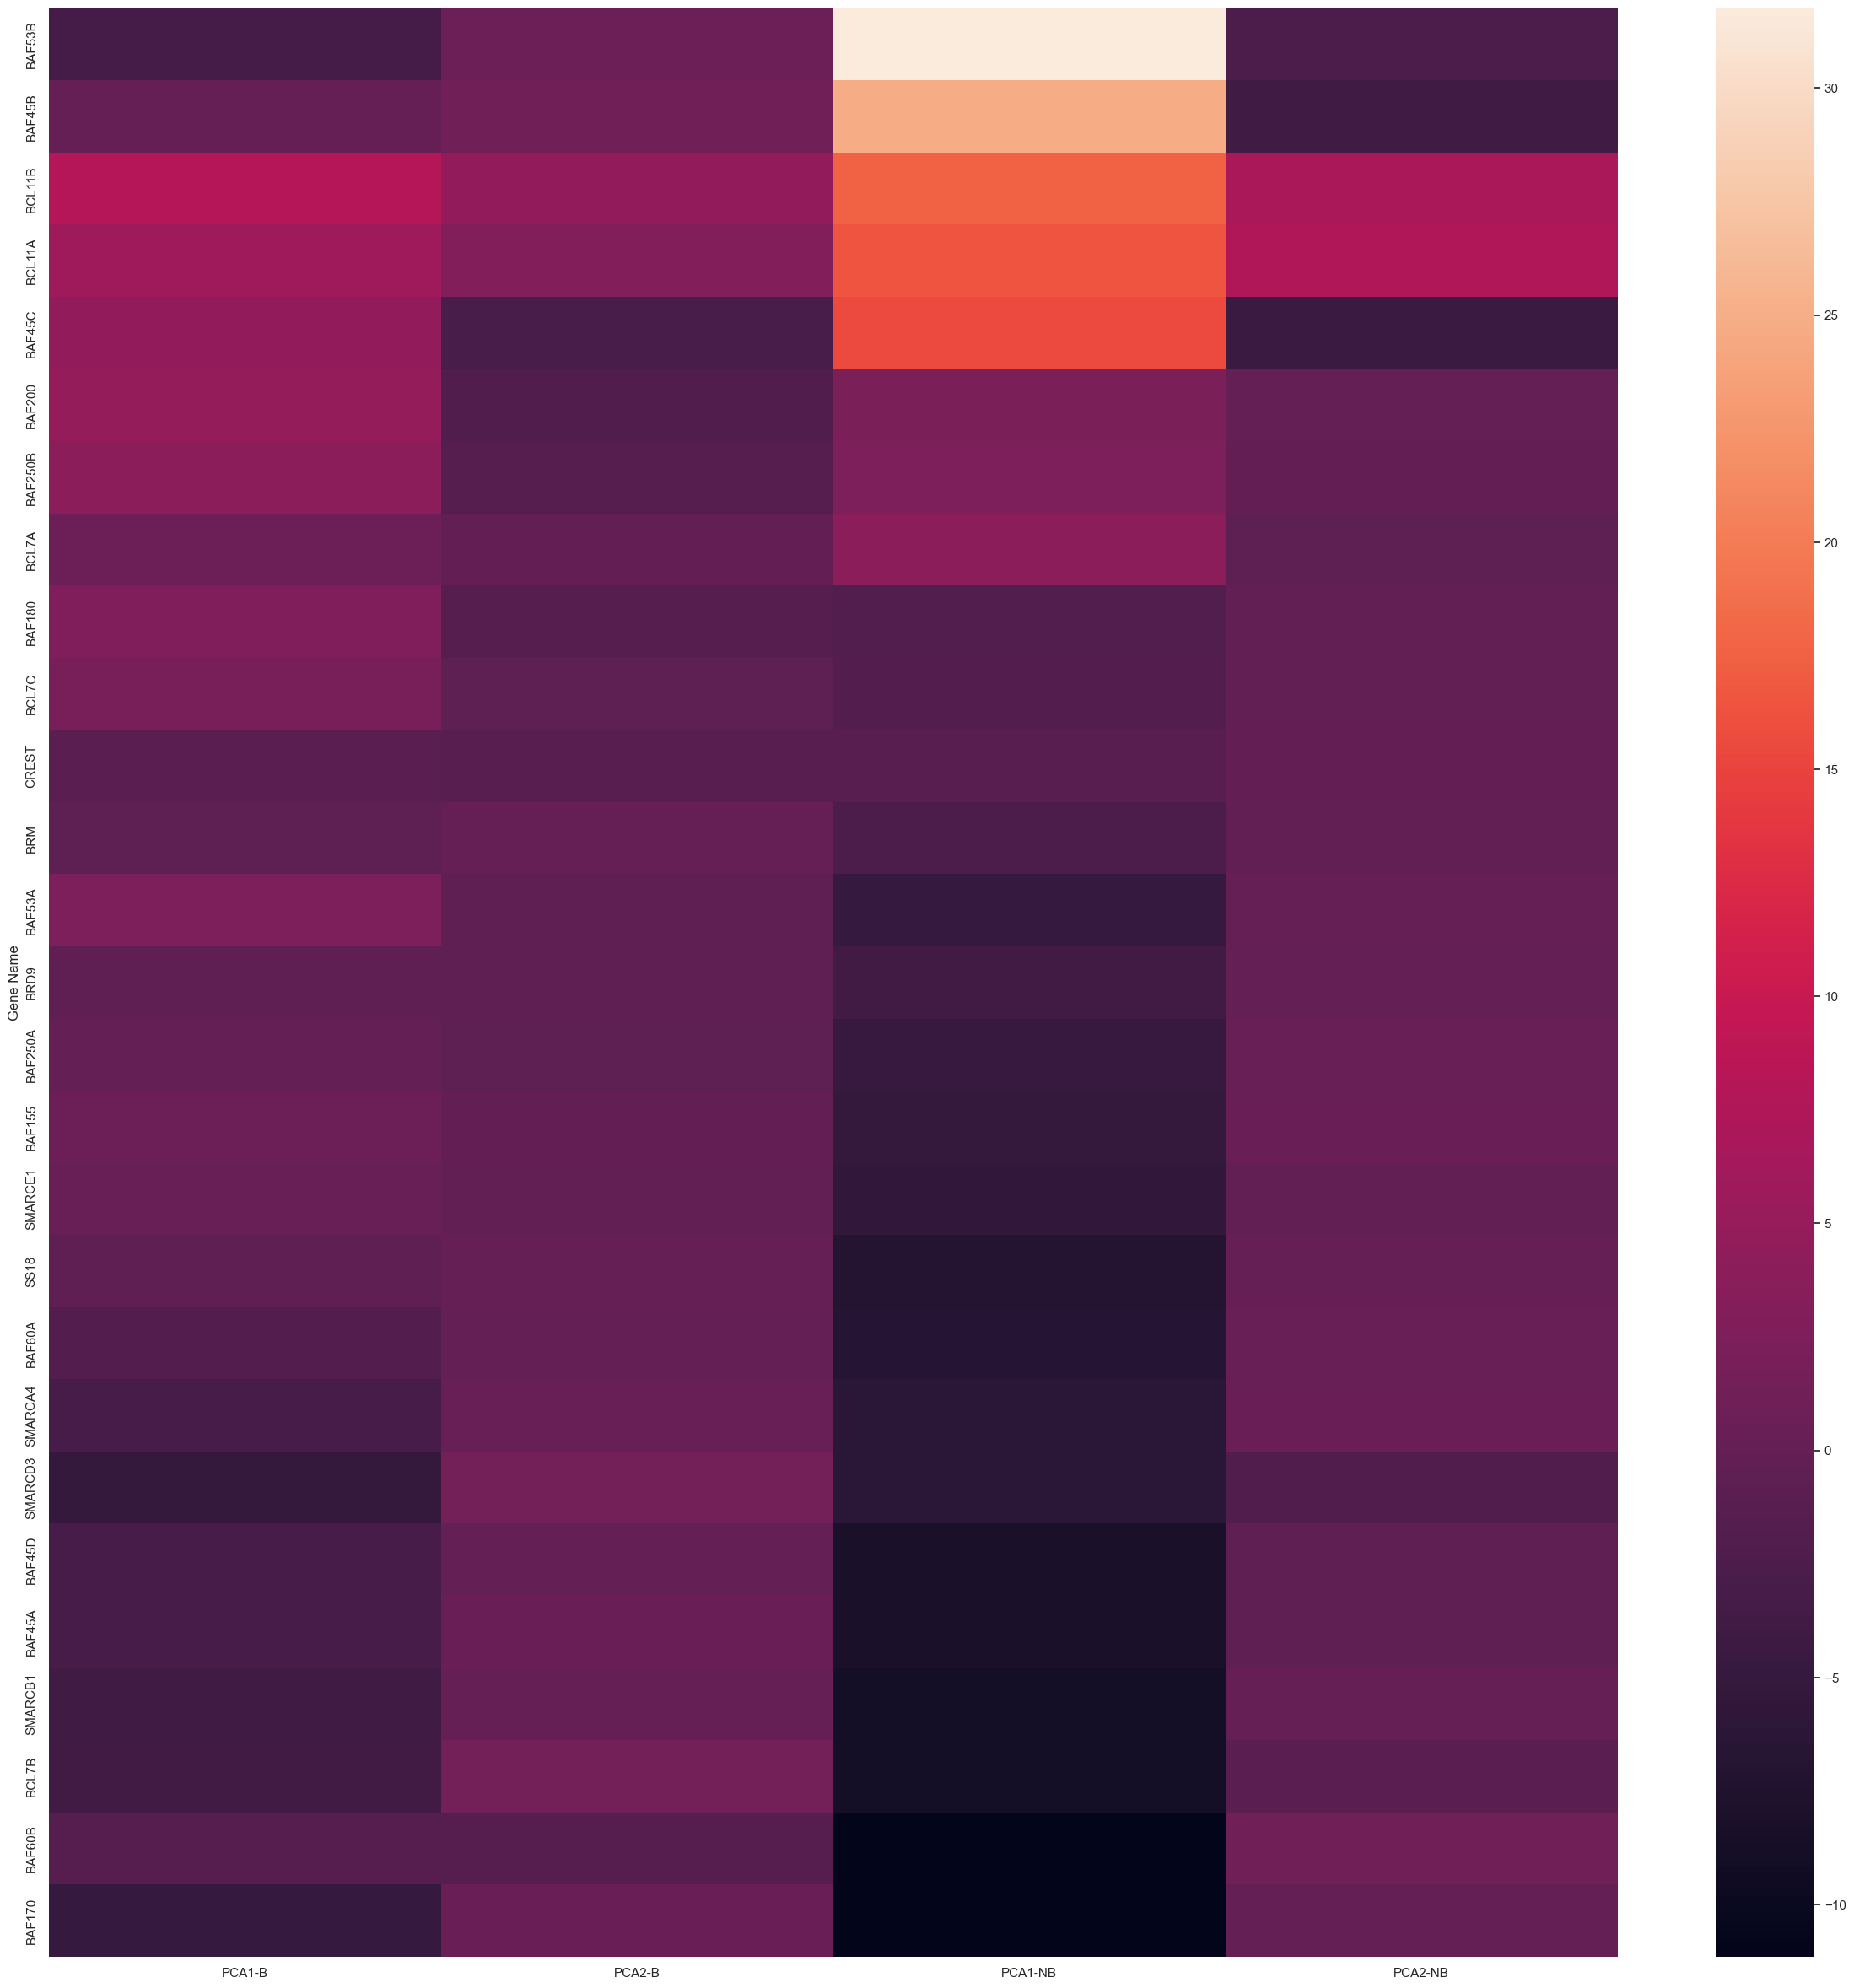

In [256]:
braionconcat = brain_PCA.merge(nobrain_PCA, left_index=True, right_index=True)
sns.heatmap(braionconcat)

In [214]:
medians_gene.columns.to_list()

['Heart_Left_Ventricle',
 'Liver',
 'Pancreas',
 'Whole_Blood',
 'Heart_Atrial_Appendage',
 'Brain_Putamen_basal_ganglia',
 'Brain_Amygdala',
 'Brain_Substantia_nigra',
 'Brain_Hippocampus',
 'Brain_Caudate_basal_ganglia',
 'Kidney_Cortex',
 'Brain_Anterior_cingulate_cortex_BA24',
 'Muscle_Skeletal',
 'Brain_Nucleus_accumbens_basal_ganglia',
 'Brain_Hypothalamus',
 'Brain_Spinal_cord_cervical_c-1',
 'Brain_Cortex',
 'Kidney_Medulla',
 'Brain_Frontal_Cortex_BA9',
 'Stomach',
 'Adrenal_Gland',
 'Minor_Salivary_Gland',
 'Adipose_Visceral_Omentum',
 'Colon_Transverse',
 'Esophagus_Mucosa',
 'Small_Intestine_Terminal_Ileum',
 'Adipose_Subcutaneous',
 'Esophagus_Muscularis',
 'Esophagus_Gastroesophageal_Junction',
 'Breast_Mammary_Tissue',
 'Skin_Not_Sun_Exposed_Suprapubic',
 'Spleen',
 'Artery_Coronary',
 'Skin_Sun_Exposed_Lower_leg',
 'Lung',
 'Colon_Sigmoid',
 'Artery_Aorta',
 'Prostate',
 'Bladder',
 'Artery_Tibial',
 'Pituitary',
 'Vagina',
 'Brain_Cerebellum',
 'Cells_Cultured_fibrobla